In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import os

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [76]:
states = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 'Tasmania',
          'Northern Territory']
states_abb = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT']

# Specify the Excel file path
total_consumption_path = 'total.xlsx'

# Read the Excel file into a pandas DataFrame
total_consumption = pd.read_excel(total_consumption_path, engine='openpyxl')
total_consumption = pd.DataFrame(total_consumption)

print(total_consumption.shape)
print(total_consumption.head())

(14, 7)
     NSW    VIC    QLD     SA     WA    TAS     NT
0  100.0  100.0  100.0  100.0  100.0  100.0  100.0
1  104.8  105.3  102.8  104.6  103.9  102.0  101.6
2  106.1  107.7  104.0  105.3  104.9  102.2  103.3
3  106.2  108.1  104.4  106.5  105.6  103.4  109.7
4  107.3  110.3  105.5  107.3  107.1  102.2  110.5


<Axes: >

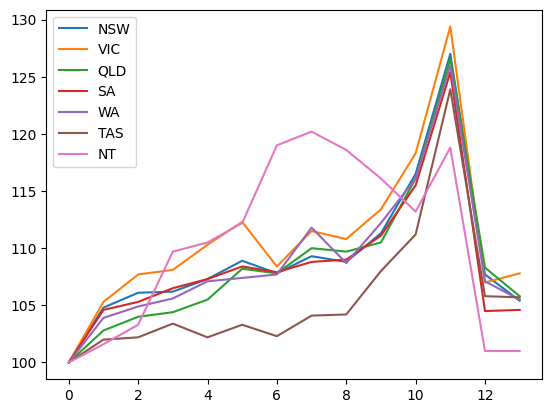

In [77]:
total_consumption.plot()

<Axes: >

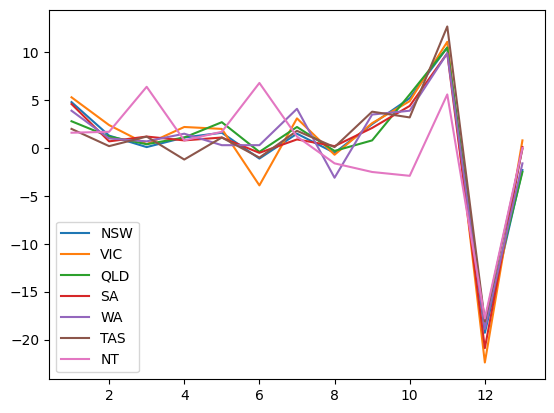

In [78]:
total_consumption = total_consumption.diff().dropna()
total_consumption.plot()

In [79]:
def adf_test(series, title):
    print("---------------------------------------")
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')  # .dropna() handles differenced data
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
    print(out.to_string())  # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
        print("---------------------------------------")
        return 1
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        print("---------------------------------------")
        return 0



In [83]:
total_true = 0
while total_true < 7:
    for state in states_abb:
        total_true += adf_test(total_consumption[state],state )
    if total_true == 7:
        break
    total_consumption = total_consumption.diff().dropna()
    total_true = 0



---------------------------------------
Augmented Dickey-Fuller Test: NSW
ADF test statistic     -1.510374
p-value                 0.528374
# lags used             4.000000
# observations          8.000000
critical value (1%)    -4.665186
critical value (5%)    -3.367187
critical value (10%)   -2.802961
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
---------------------------------------
---------------------------------------
Augmented Dickey-Fuller Test: VIC
ADF test statistic     -2.407021
p-value                 0.139765
# lags used             4.000000
# observations          8.000000
critical value (1%)    -4.665186
critical value (5%)    -3.367187
critical value (10%)   -2.802961
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
---------------------------------------
---------------------------------------
Augmented Dickey-Fuller Test: 

ValueError: sample size is too short to use selected regression component

In [67]:
total_consumption = total_consumption.diff().dropna()
for state in states_abb:
    time = 0
    adf_test(total_consumption[state],state )

---------------------------------------
Augmented Dickey-Fuller Test: NSW
ADF test statistic     -2.317972
p-value                 0.166237
# lags used             2.000000
# observations          8.000000
critical value (1%)    -4.665186
critical value (5%)    -3.367187
critical value (10%)   -2.802961
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
---------------------------------------
---------------------------------------
Augmented Dickey-Fuller Test: VIC
ADF test statistic      0.251447
p-value                 0.975004
# lags used             3.000000
# observations          7.000000
critical value (1%)    -4.938690
critical value (5%)    -3.477583
critical value (10%)   -2.843868
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
---------------------------------------
---------------------------------------
Augmented Dickey-Fuller Test: 

In [39]:
# Train model
test_obs = 6

In [40]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(total_consumption)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1


LinAlgError: 7-th leading minor of the array is not positive definite